# 1. Bitta test varaqasini tekshirish

### Kerakli kutubxonalar

In [140]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import glob

### Bo'sh test varaqasini yuklash

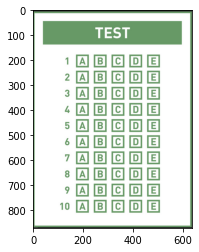

In [2]:
rasm_null = cv2.imread("DTM/test_null.png")
rasm_null = cv2.cvtColor(rasm_null, cv2.COLOR_BGR2RGB)
plt.imshow(rasm_null)
plt.show()

### Belgilangan test varaqasini yuklash

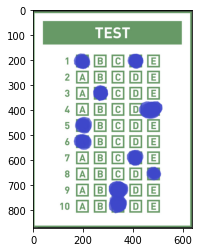

In [126]:
rasm_javob = cv2.imread("DTM/test_3.png")
rasm_javob = cv2.cvtColor(rasm_javob, cv2.COLOR_BGR2RGB)
plt.imshow(rasm_javob)
plt.show()

### To'g'ri javoblar

In [127]:
togri_javob = ["A","D","D","E","A","D","B","C","A","E"]

### Belgilangan javoblardan maska olish

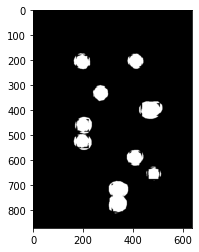

In [128]:
m = np.array([0,0,200])
m_1 = np.array([200,200,255])
maska = cv2.inRange(rasm_javob,m,m_1)
plt.imshow(maska, cmap="gray")
plt.show()

### Bo'sh test varaqasidan nusxa olish

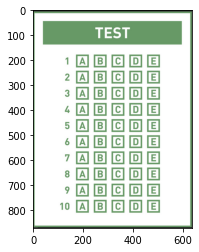

In [129]:
copy_rasm = np.copy(rasm_null)
plt.imshow(copy_rasm)
plt.show()

### Nusxalangan rasmdan maskani ajratib olish

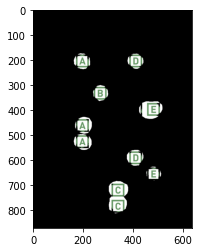

In [130]:
copy_rasm[maska==0]= 0,0,0
plt.imshow(copy_rasm)
plt.show()

### Y o'qi bo'yicha javoblarni qirqib olish

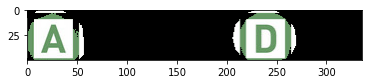

In [131]:
javob = []
for i in range(175,850,65):
    javob.append(copy_rasm[i:i+50,171:507])
plt.imshow(javob[0],cmap="gray")
plt.show()

### Bo'lib olingan javoblarni X o'qi bo'yicha bo'laklarga bo'lish

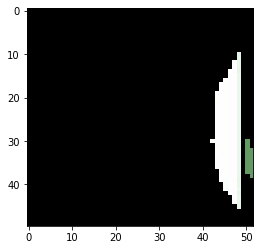

In [134]:
javoblar = []

for i in range(10):
    javoblar_1 = []
    for j in range(0,336,70):
        javoblar_1.append(javob[i][:,j:j+52])
    javoblar.append(javoblar_1)
plt.imshow(javoblar[3][3], cmap="gray")
plt.show()

In [121]:
len(javoblar)

10

### Qirqib olingan javoblarning o'rtachasini topib, matritsaga append qilish

In [135]:
urta = []
for i in range(10):
    urta_1 = []
    for j in range(5):
        urta_1.append(np.mean(javoblar[i][j]))
    urta.append(urta_1)
print(urta)

[[166.2052564102564, 0.0, 0.0, 172.1503846153846, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 167.91166666666666, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 16.682435897435898, 192.46589743589743], [165.0975641025641, 0.0, 0.0, 0.0, 0.0], [164.79192307692307, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 174.4671794871795, 0.0], [0.0, 0.0, 0.0, 0.0, 141.0653846153846], [0.0, 0.0, 185.5601282051282, 0.0, 0.0], [0.0, 0.0, 172.62615384615384, 0.0, 0.0]]


In [136]:
(75/255)*100

29.411764705882355

### Topilgan o'rtacha qiymatlarni 30% dan ortig'ini to'g'ri sifatida olish

In [141]:
jb = []
for i in range(10):
    jb_1 = []
    j = 0
    a,b,c,d,e = True,True,True,True,True
    for j in range(5):
        if a and urta[i][0] > 75:
            jb_1.append("A")
            a = False
        if b and urta[i][1] > 75:
            jb_1.append("B")
            b = False
        if c and urta[i][2] > 75:
            jb_1.append("C")
            c = False
        if d and urta[i][3] > 75:
            jb_1.append("D")
            d = False
        if e and urta[i][4] > 75:
            jb_1.append("E")
            e = False
    jb.append(jb_1)       
print(jb)

[['A', 'D'], [], ['B'], ['E'], ['A'], ['A'], ['D'], ['E'], ['C'], ['C']]


### Yechilgan javob bilan to'g'ri javoblarni solishtirish

In [142]:
ball = 0
for i in range(len(togri_javob)):
    if len(jb[i]) == 1: # har bir javob belgilanmagan yoki 1 dan ortiq belgilanganini noto'g'ri sifatida olish
        if togri_javob[i] == jb[i][0]:
            ball += 1
print("Ball: ",ball)
print(f"Sizning natijangiz: {(ball*100)/len(togri_javob)} % ")

Ball:  2
Sizning natijangiz: 20.0 % 


In [139]:
togri_javob

['A', 'D', 'D', 'E', 'A', 'D', 'B', 'C', 'A', 'E']

# 2. Bir nechta javoblarni tekshirish

### Papkadagi rasmlarni olish

In [145]:
path_test = glob.glob(os.path.join("DTM/*"))
path_test

['DTM\\test_1.png', 'DTM\\test_2.png', 'DTM\\test_3.png', 'DTM\\test_null.png']

### Bo'sh test javob varaqasi

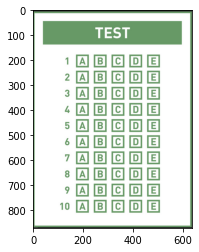

In [175]:
rasm_null = cv2.imread(path_test[3])
rasm_null = cv2.cvtColor(rasm_null, cv2.COLOR_BGR2RGB)
plt.imshow(rasm_null)
plt.show()

### Belgilangan javoblarni olish

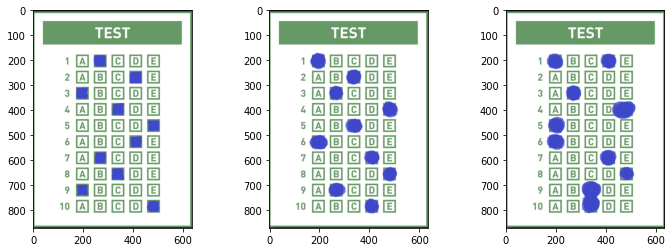

In [167]:
javoblar = []
for i in range(3):
    jb = cv2.imread(path_test[i])
    jb = cv2.cvtColor(jb, cv2.COLOR_BGR2RGB)
    javoblar.append(jb)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(javoblar[0])
plt.subplot(1,3,2)
plt.imshow(javoblar[1])
plt.subplot(1,3,3)
plt.imshow(javoblar[2])
plt.show()

### Maska olish

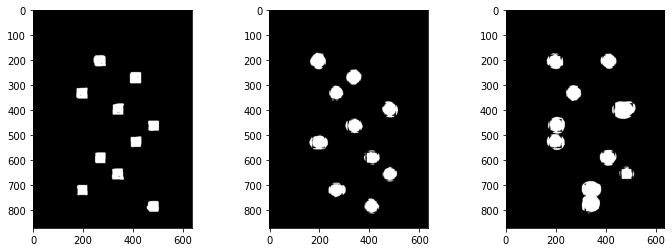

In [170]:
r_1 = np.array([0,0,200])
r_2 = np.array([200,200,255])
maska = []
for i in range(3):
    maska.append(cv2.inRange(javoblar[i],r_1,r_2))
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(maska[0], cmap="gray")
plt.subplot(1,3,2)
plt.imshow(maska[1], cmap="gray")
plt.subplot(1,3,3)
plt.imshow(maska[2], cmap="gray")
plt.show()

### Asl rasmdan nusxa olish

In [179]:
rasm_copy = []
for i in range(3):
    rasm_copy.append(np.copy(rasm_null))

### Asl rasm bilan maskani birlashtirish

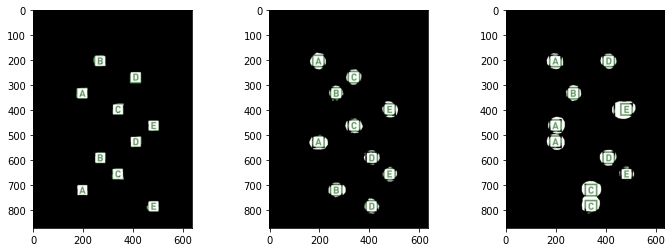

In [180]:
for i in range(3):
    rasm_copy[i][maska[i]==0] = 0,0,0
    
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(rasm_copy[0])
plt.subplot(1,3,2)
plt.imshow(rasm_copy[1])
plt.subplot(1,3,3)
plt.imshow(rasm_copy[2])
plt.show()

### Y o'qi bo'yicha qirqish

In [182]:
def y_uq(rasm_copy):
    javob_y = []
    for i in range(175,850,65):
        javob_y.append(rasm_copy[i:i+50,171:507])
    return javob_y

In [206]:
y_uqlar = []
for i in range(3):
    y_uqlar.append(y_uq(rasm_copy[i]))

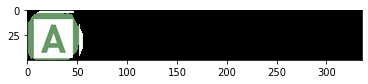

In [207]:
plt.imshow(y_uqlar[1][0],cmap="gray")
plt.show()

### X o'qi bo'yicha qirqish

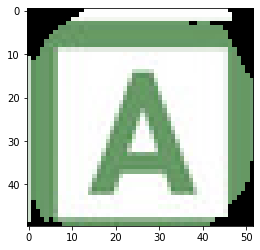

In [211]:
x_uq = []
for k in range(3):
    x_uq_1 = []
    for i in range(10):
        x_uq_2 = []
        for j in range(0,336,70):
            x_uq_2.append(y_uqlar[k][i][:,j:j+52])
        x_uq_1.append(x_uq_2)
    x_uq.append(x_uq_1)
plt.imshow(x_uq[1][0][0], cmap="gray")
plt.show()

### O'rtacha qiymatlarni olish

In [215]:
urta = []
for k in range(3):
    urta_1 = []
    for i in range(10):
        urta_2 = []
        for j in range(5):
            urta_2.append(np.mean(x_uq[k][i][j]))
        urta_1.append(urta_2)
    urta.append(urta_1)
print(urta)

[[[0.0, 148.04051282051282, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 144.45910256410255, 0.0], [147.02064102564103, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 148.19641025641025, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 138.5123076923077], [0.0, 0.0, 0.0, 137.17435897435897, 0.0], [0.0, 137.39089743589744, 0.0, 0.0, 0.0], [0.0, 0.0, 151.48628205128205, 0.0, 0.0], [135.54628205128205, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 146.12974358974358]], [[177.28794871794872, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 177.05871794871794, 0.0, 0.0], [0.0, 158.51820512820512, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 163.34897435897435], [0.0, 0.0, 167.21461538461537, 0.0, 0.0], [163.37628205128206, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 147.57371794871796, 0.0], [0.0, 0.0, 0.0, 0.0, 150.5425641025641], [0.0, 158.77653846153845, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 156.9398717948718, 0.0]], [[166.2052564102564, 0.0, 0.0, 172.1503846153846, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 167.91166666666666, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 16.68243589743589

### Belgilangan javoblarni olish

In [227]:
jb = []
for k in range(3):
    jb_1 = []
    for i in range(10):
        jb_2 = []
        a,b,c,d,e = True,True,True,True,True
        for j in range(5):
            if a and urta[k][i][0] > 75:
                jb_2.append("A")
                a = False
            if b and urta[k][i][1] > 75:
                jb_2.append("B")
                b = False
            if c and urta[k][i][2] > 75:
                jb_2.append("C")
                c = False
            if d and urta[k][i][3] > 75:
                jb_2.append("D")
                d = False
            if e and urta[k][i][4] > 75:
                jb_2.append("E")
                e = False
        jb_1.append(jb_2)
    jb.append(jb_1)       
print(jb)

[[['B'], ['D'], ['A'], ['C'], ['E'], ['D'], ['B'], ['C'], ['A'], ['E']], [['A'], ['C'], ['B'], ['E'], ['C'], ['A'], ['D'], ['E'], ['B'], ['D']], [['A', 'D'], [], ['B'], ['E'], ['A'], ['A'], ['D'], ['E'], ['C'], ['C']]]


### Javoblarni to'g'risi bilan solishtirish

In [234]:
javoblar = []
for j in range(3):
    ball = 0
    for i in range(len(togri_javob)):
        if len(jb[j][i]) == 1: #har bir javob belgilanmagan yoki 1 dan ortiq belgilanganini noto'g'ri sifatida olish
            if togri_javob[i] == jb[j][i][0]:
                ball += 1
    javoblar.append(ball)

for i in range(len(javoblar)):
    print(f"{i+1}. Ball: {javoblar[i]}")
    print(f"   Sizning natijangiz: {(javoblar[i]*100)/len(togri_javob)} % ")

1. Ball: 6
   Sizning natijangiz: 60.0 % 
2. Ball: 2
   Sizning natijangiz: 20.0 % 
3. Ball: 2
   Sizning natijangiz: 20.0 % 
